In [7]:
# write your code here
"""
☆*°☆*°(∩^o^)~━━  2017/12/1 23:55        
      (ˉ▽￣～) ~~ 一捆好葱 (软件4班饶浩聪) (*˙︶˙*)☆*°
      Fuction： 机器学习lab1(py2.7代码 不兼容3的地方已注释√ ━━━━━☆*°☆*°
"""
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random


def get_data():
	data = load_svmlight_file("lab_1_Housing_data")
	return data[0], data[1]


# h为假设函数，即目标函数
def h(x, w, b):
	h_result = 0
	x = np.ndarray.tolist(x)
	# print x
	for i in range(len(x[0])):
		h_result += x[0][i] * w[i]
	h_result += b
	return h_result

# 计算回归的准确率，以20作为误差标准
def cal_accuracy(w, b, X_val, y_val):
	x = np.ndarray.tolist(X_val)
	right_num = 0
	for i in range(len(x[0])):
		result = h(X_val[i, :], w, b)
		if abs(result - y_val[i]) < 20:
			right_num += 1
	return float(right_num) / float(len(x[0]))


def LR(options):
	X, y = get_data()
	# 将原训练集再切分为2:1的更小训练集和验证集
	X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)
	# 初始化参数的三种方式，共有13个属性，即13个系数
	if options == 1:
		w = [0] * 13
	elif options == 2:
		w = np.random.rand(13)
	else:
		w = np.random.randn(13)
	# b = 0
	b = random.random()
	# loss函数为 1/(2*n) * sum([(h(X[i])-y[i])**2 for i in range(n)]) n为向量维度
	# w[i] = w[i] - a * 1/n * sum([(h(X[i])-y[i]) for i in range(n)]) a为学习系数 0.0001 0.0016 0.03
	a = 0.0016
	n = 13
	X_train = X_train.todense()
	X_val = X_val.todense()
	X_size = len(X_train)
	X_val_size = len(X_val)
	loss = 1.0 / (2 * X_size) * sum([(h(X_train[i, :], w, b) - y_train[i]) ** 2 for i in range(X_size)])
	# print loss
	cnt = 0
	train_loss = []
	val_loss = []
	while True:
		# 先计算梯度平均要用到的中间量(从求导结果中得到)，再计算梯度平均(结合每个样本的xi)，再对w各分量wi进行下降
		t = sum([(h(X_train[i, :], w, b) - y_train[i]) for i in range(X_size)])
		# 对w各分量wi进行下降
		for i in range(13):
			gradient_aver = sum([(t * X_train[k, i]) for k in range(X_size)]) / X_size
			w[i] -= gradient_aver * a
		# print cal_accuracy(w, b, X_val, y_val)
		new_loss = 1.0 / (2 * X_size) * sum([(h(X_train[i, :], w, b) - y_train[i]) ** 2 for i in range(X_size)])
		v_loss = 1.0 / (2 * X_val_size) * sum([(h(X_val[i, :], w, b) - y_val[i]) ** 2 for i in range(X_val_size)])
# 当loss变化幅度小于0.0001时停止
		if abs(loss - new_loss) > 0.0001:
			loss = new_loss
			# print new_loss
		else:
			break
		train_loss.append(loss)
		val_loss.append(v_loss)
		cnt += 1
# 当迭代次数大于200时也停止
		if cnt > 200:
# 			print('Final: Train_loss = %f, val_loss = %f' % loss, v_loss)
			break
	plt.figure(figsize=(8, 6))
	plt.xlabel('Gradient descent - Iteration times')
	plt.ylabel('Loss')
	plt.plot(range(cnt), train_loss, 'o-', label=u"Training Set")
	plt.plot(range(cnt), val_loss, 'r-', label=u"Validation set")
	plt.legend()
	plt.grid()
	plt.show()
    

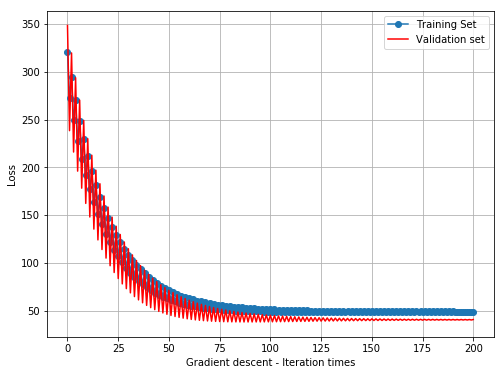

In [14]:
LR(1) # 模型参数 - > 各分量权重初始化为 0

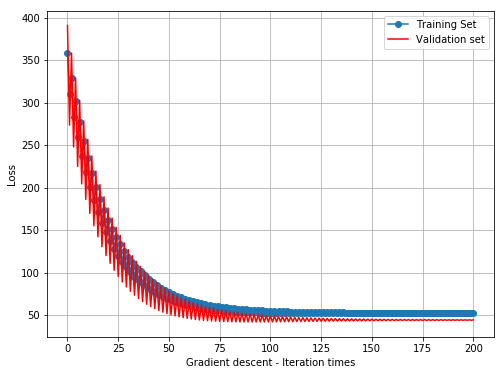

In [16]:
LR(2) # 模型参数 - > 各分量权重初始化为 随机分布

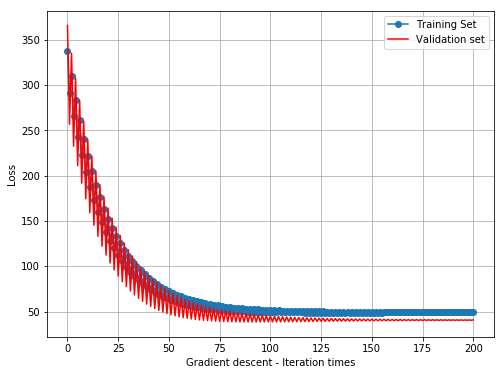

In [15]:
LR(3) # 模型参数 - > 各分量权重初始化为 高斯分布